In [20]:
'''IMPORT LIBRARY'''
import lasio
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [21]:
'''IMPORT DATA'''
# Simpan data well log dalam DataFrame
data = pd.read_excel("DATA COBA.xlsx")  # Ganti 'data_well_log.csv' dengan nama file Anda
dataframe = data[['GR', 'RHOB', 'NPHI', 'DTCO', 'DTSM','LITOLOGI','DEPTH']]  # Pindahkan kolom DEPTH ke posisi pertama
cols = data.columns.values  # Menghilangkan kolom Depth dari daftar kolom
depth = data['DEPTH']  # Kolom Depth untuk sumbu y

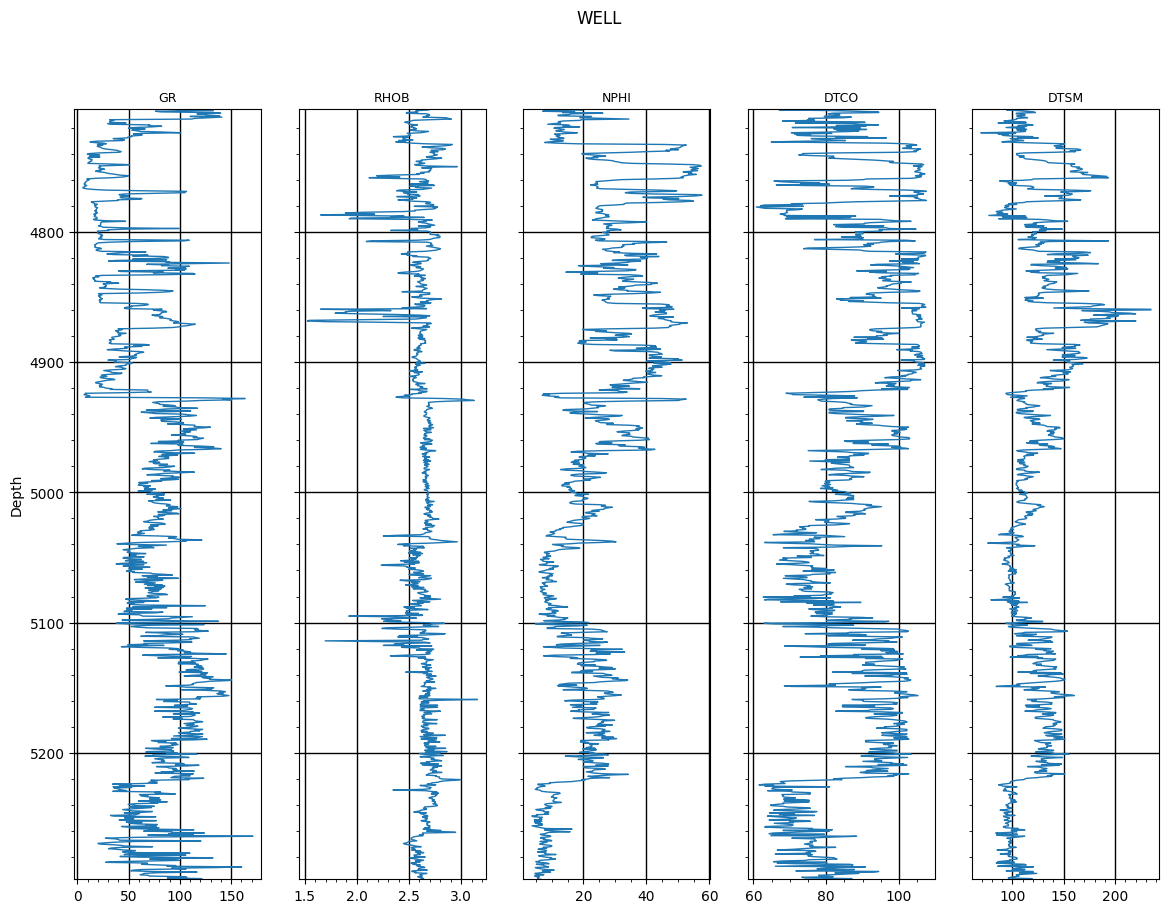

In [22]:
column = ['GR', 'RHOB', 'NPHI', 'DTCO', 'DTSM']
fig, ax = plt.subplots(nrows=1, ncols=len(column), figsize=(14, 10), sharey=True)
fig.suptitle('WELL', fontsize=12)

select_mnemonics = cols

for i, cols in enumerate(column):
    ax[i].plot(dataframe[cols], depth, linewidth=1)
    ax[i].set_ylim(max(depth), min(depth))
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle="-", linewidth="1", color="black")
    ax[i].set_title(f'{cols}', fontsize=9)

# Mengubah label sumbu y menjadi "Depth"
ax[0].set_ylabel("Depth")

plt.show()

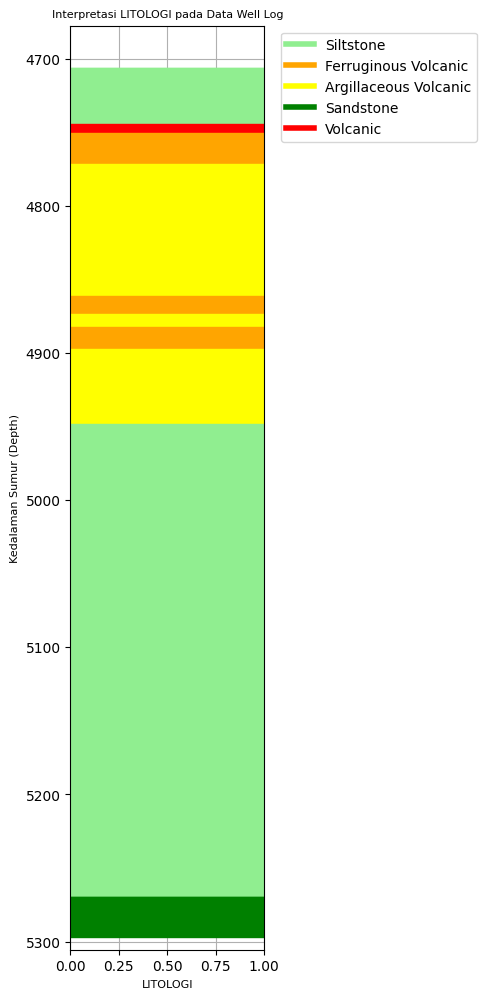

In [23]:
'''PLOTTING LITOLOGI'''
# Membuat kamus warna untuk setiap tipe formasi
color_map = {
    'Siltstone': 'LIGHTGREEN',
    'Ferruginous Volcanic': 'ORANGE',
    'Argillaceous Volcanic': 'YELLOW',
    'Sandstone': 'GREEN',
    'Volcanic' : 'RED'
}

# Buat grafik
plt.figure(figsize=(2.5, 12))

# Loop melalui data kedalaman (depth) dan tipe formasi
for i, row in data.iterrows():
    depth = row['DEPTH']
    formation_type = row['LITOLOGI']  # Ganti dengan nama kolom yang sesuai

    # Tentukan warna berdasarkan tipe formasi
    color = color_map.get(formation_type, 'black')

    # Plot garis vertikal dengan warna yang sesuai
    plt.axhline(y=depth, color=color, linewidth=1)

# Atur label dan judul grafik
plt.xlabel('LITOLOGI', fontsize=8)
plt.ylabel('Kedalaman Sumur (Depth)', fontsize=8)
plt.title('Interpretasi LITOLOGI pada Data Well Log', fontsize=8)

# Tambahkan legenda untuk warna
legend_elements = [plt.Line2D([0], [0], color=color, lw=4, label=formation_type) for formation_type, color in color_map.items()]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

# Tampilkan grafik
plt.gca().invert_yaxis()  # Balikkan sumbu y agar sesuai dengan kedalaman sumur sejati
plt.grid(True)
plt.show()


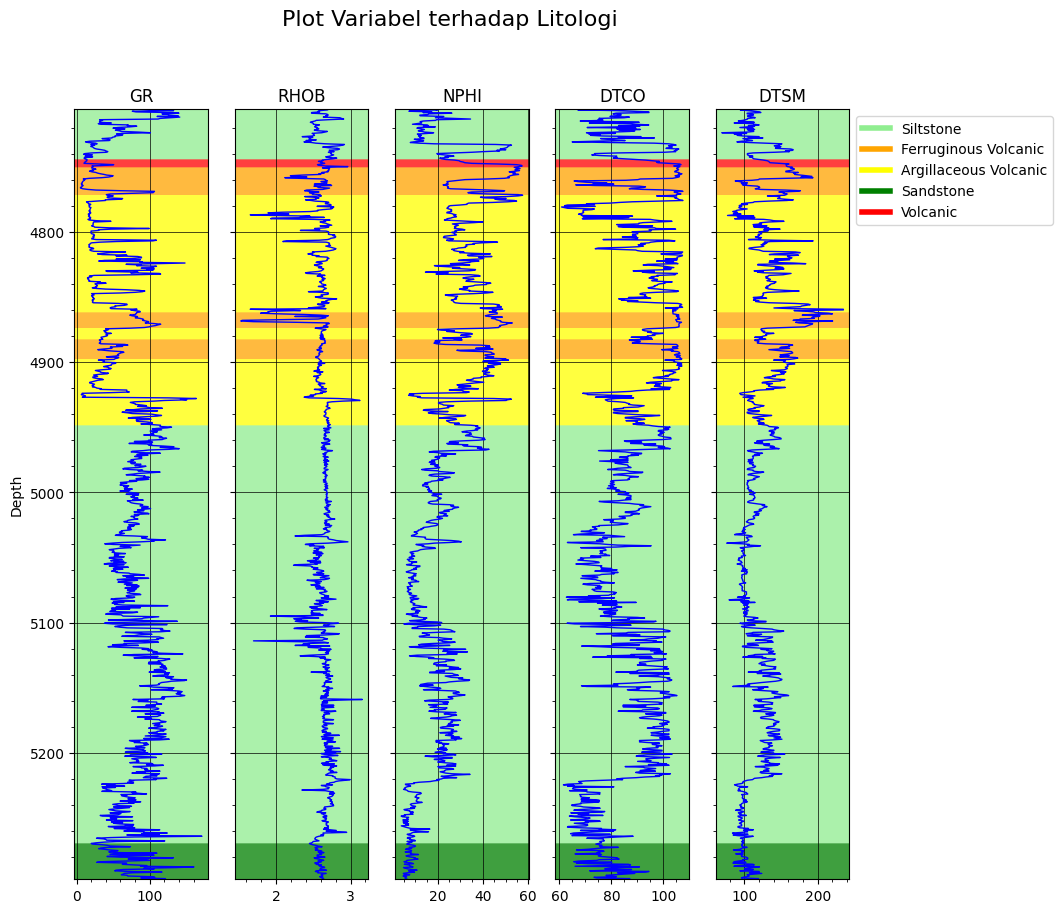

In [24]:
#data = LogData1[['Gamma ray', 'Bulk density', 'Porosity Total', 'Delta-t', 'Sonic porosity', 'Vp', 'Acoustic Impedance', 'DEPTH', 'Type of Formation']]
cols = dataframe.columns.values[:-2]  # Menghilangkan kolom Depth dari daftar kolom
depth = dataframe['DEPTH']  # Kolom Depth untuk sumbu y
fig, ax = plt.subplots(nrows=1, ncols=len(cols), figsize=(10, 10), sharey=True)
fig.suptitle('Plot Variabel terhadap Litologi', fontsize=16)

select_mnemonics = cols

# Membuat kamus warna untuk setiap tipe formasi
color_map = {
    'Siltstone': 'LIGHTGREEN',
    'Ferruginous Volcanic': 'ORANGE',
    'Argillaceous Volcanic': 'YELLOW',
    'Sandstone': 'GREEN',
    'Volcanic' : 'RED'
}

for i in range(len(cols)):
    ax[i].plot(dataframe.iloc[:, i], depth, linewidth=1, color='blue')
    ax[i].set_ylim(max(depth), min(depth))
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle="-", linewidth="0.5", color="black")
    ax[i].set_title(f'{select_mnemonics[i]}', fontsize=12)
    
    for j in range(len(dataframe)):
        formation_type = dataframe.iloc[j]['LITOLOGI']
        color = color_map.get(formation_type, 'white')

        ax[i].axhspan(dataframe.iloc[j]['DEPTH'], dataframe.iloc[j]['DEPTH'] + 1, facecolor=color, alpha=0.5)

# Menambahkan legenda di subplot pertama (ax[0])
legend_labels = []
for formation_type, color in color_map.items():
    if formation_type not in legend_labels:
        ax[0].plot([], [], color=color, label=formation_type)
        legend_labels.append(formation_type)
ax[0].legend(handles=legend_elements, bbox_to_anchor=(5.8, 1), loc='upper left')
ax[0].set_ylabel("Depth")

plt.show()